<h2 style="color:purple" align="center">Linear Regression: Fuel Consumption Prediction</h2>

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [2]:
#Import Packages
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
#Load and read dataset
df = pd.read_csv('E:\Python\ML_Learn\Predict_Fuel_Consumption_Model\FuelConsumptionCo2.csv')
df.describe()
cdf = df[["ENGINESIZE","CYLINDERS","TRANSMISSION","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,AS5,8.5,196
1,2.4,4,M6,9.6,221
2,1.5,4,AV7,5.9,136
3,3.5,6,AS6,11.1,255
4,3.5,6,AS6,10.6,244
...,...,...,...,...,...
1062,3.0,6,AS6,11.8,271
1063,3.2,6,AS6,11.5,264
1064,3.0,6,AS6,11.8,271
1065,3.2,6,AS6,11.3,260


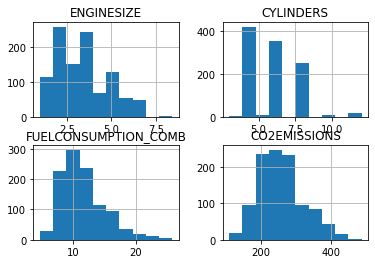

In [3]:
# Select some features to explore
viz = df[["ENGINESIZE","CYLINDERS","TRANSMISSION","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


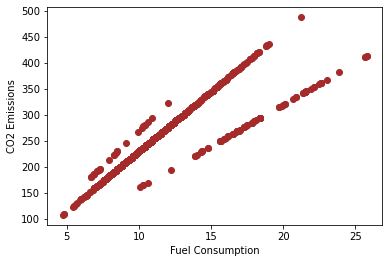

In [4]:
# Visualize the relationship between Fuel Consumption and CO2 Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, marker = "o",color = "brown")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()

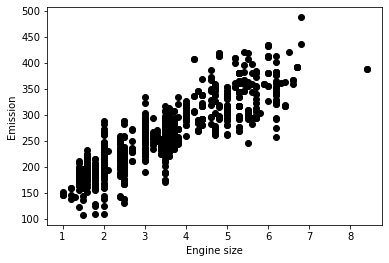

In [5]:
# Visualize the relationship between Engine size and CO2 Emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

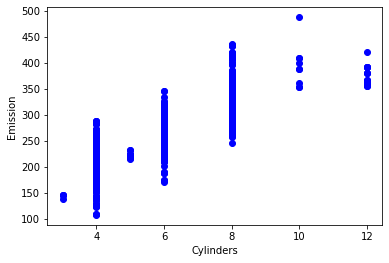

In [130]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [8]:
msk = np.random.rand(len(df)) < 0.8 #Take 80% of dataset by random and store to msk
train = cdf[msk] # Data for trainning
test = cdf[~msk] # Data for testing (data point that not belongs to msk)

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value what using linear approximation.

Now, let's build LR model to predict CO2 Emissions (y) through EngineSize feature (x).

### Visualize data used for training

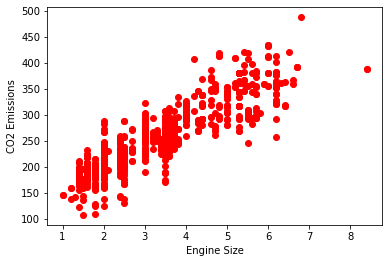

In [9]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = "red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

### Training process with 80% data of dataset

In [10]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
#Create training set array 
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)
print("The coefficent: ",reg.coef_)
print("The intercept: ",reg.intercept_)

The coefficent:  [[39.65747919]]
The intercept:  [124.38025765]


### Result: y = 39.65747919x + 124.38025765 (y: CO2EMISSIONS x: ENGINESIZE)

### OUTPUT PLOT

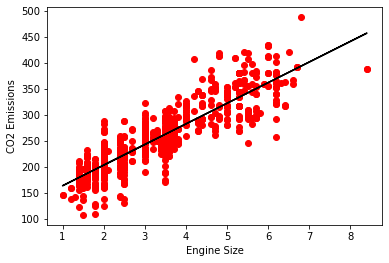

In [14]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = "red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
x_fitline = train_x
y_fitline = reg.coef_ * train_x + reg.intercept_
plt.plot(x_fitline,y_fitline, color = "black")
plt.show()

### Testing Process with 20% data of dataset

Calculate the model accuracy by using MAE and MSE.

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

In [16]:
from sklearn.metrics import r2_score
# Create testset array
# np.mean is used to calculate avarage value of array, so we put every error value 
# (different between y(real) and y(predict)) to array and calculate the total loss value.
# R2_score is the parameter determined by the equation: R2 = 1
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
y_predict = reg.predict(test_x)
print("MAE: ", np.mean(np.absolute(y_predict-test_y)))
print("MSE: ",np.mean((y_predict-test_y)**2))
print("R_2 score: ",r2_score(y_predict,test_y))

MAE:  24.413016020001145
MSE:  1046.7149735274427
R_2 score:  0.6634444848876471


### Continue with LR Model between FUELCONSUMPTION_COMB and CO2EMISSSION

Similarly, build LR model to predict CO2 Emissions (y) through Fuelconsumption_comb feature (x).

In [18]:
#Random 80% dataset
random = np.random.rand(len(df)) < 0.8
train2 = cdf[random]
test2 = cdf[~random]

### Visualize data used for training

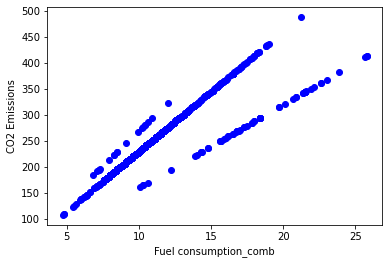

In [21]:
plt.scatter(train2.FUELCONSUMPTION_COMB,train2.CO2EMISSIONS, color = "blue")
plt.xlabel("Fuel consumption_comb")
plt.ylabel("CO2 Emissions")
plt.show()

### Training process with 80% data of dataset

In [26]:
reg2 = linear_model.LinearRegression()
train2_x = np.asanyarray(train2[["FUELCONSUMPTION_COMB"]])
train2_y = np.asanyarray(train2[["CO2EMISSIONS"]])
reg2.fit(train2_x, train2_y)
print(reg2.coef_)
print(reg2.intercept_)

[[16.65332998]]
[64.322933]


### Result: y = 16.65332998x + 64.322933 (y: CO2EMISSIONS , x: FUELCONSUMPTION_COMB)

### Visualize Output (Fitting line)

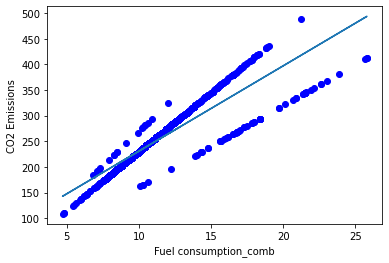

In [37]:
plt.scatter(train2.FUELCONSUMPTION_COMB,train2.CO2EMISSIONS, color = "blue")
plt.xlabel("Fuel consumption_comb")
plt.ylabel("CO2 Emissions")
show2_y = reg2.coef_ * train2_x + reg2.intercept_
plt.plot(train2_x,show2_y)
plt.show()

### Testing Process with 20% dataset

In [50]:
test2_x = np.asanyarray(test2[["FUELCONSUMPTION_COMB"]])
test2_y = np.asanyarray(test2[["CO2EMISSIONS"]])
predict2_y = reg2.predict(test2_x)
print(np.shape(predict2_y))
d = {"Real Value": np.reshape(test2_y,(223)), "Predict Value": np.asanyarray(np.reshape(predict2_y,(223)))}
res = pd.DataFrame(data=d) #Create a new data frame to compare 
res

(223, 1)


,Real Value,Predict Value
0,244,240.848231
1,212,217.533569
2,354,320.784215
3,338,309.126884
4,230,230.856233
...,...,...
218,186,179.230910
219,186,179.230910
220,225,227.525567
221,267,257.501561


## Error Value

In [51]:
print("MAE: ", np.mean(np.absolute(predict2_y-test2_y)))
print("MSE: ",np.mean((predict2_y-test2_y)**2))
print("R_2 score: ",r2_score(predict2_y,test2_y))

MAE:  21.373743763405567
MSE:  961.8289354429062
R_2 score:  0.7528706647612391
